In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

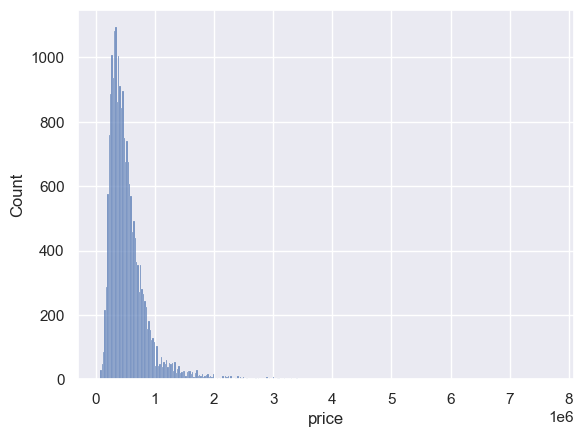

In [3]:
sns.histplot(df['price']) # u should remove outliers

<Axes: xlabel='bedrooms', ylabel='count'>

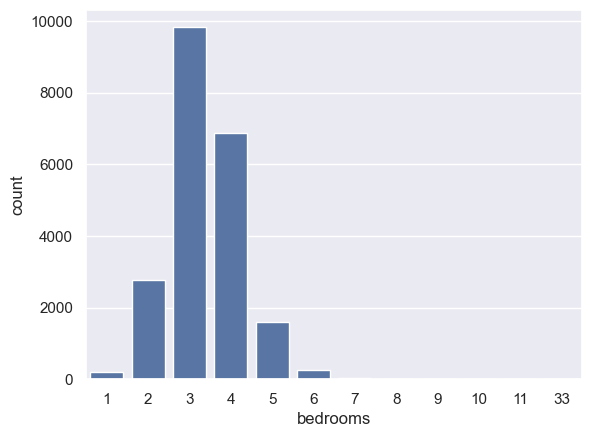

In [4]:
sns.countplot(x="bedrooms", data=df)

<Axes: xlabel='floors', ylabel='count'>

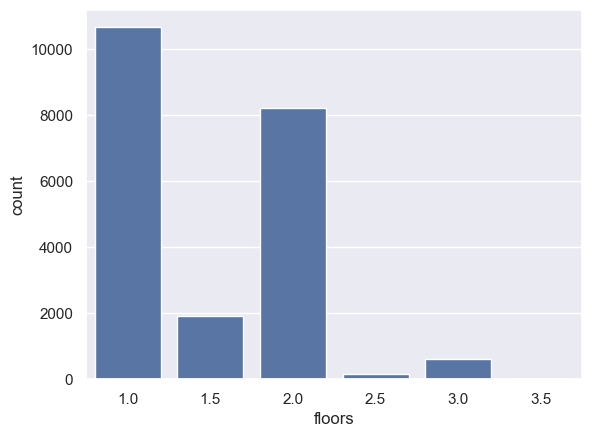

In [5]:
sns.countplot(x="floors", data=df)

In [6]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

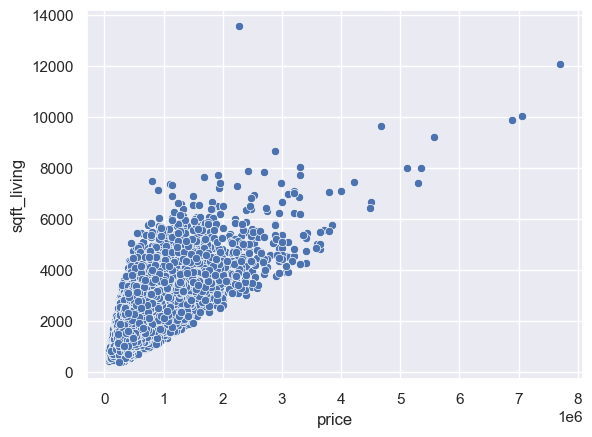

In [7]:
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='long', ylabel='lat'>

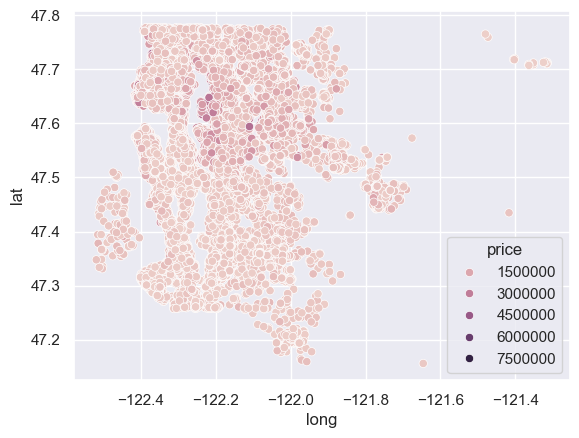

In [8]:
sns.scatterplot(x='long', y='lat', hue='price', data=df)

In [9]:
len(df) * 0.01

215.97

<Axes: xlabel='price', ylabel='Count'>

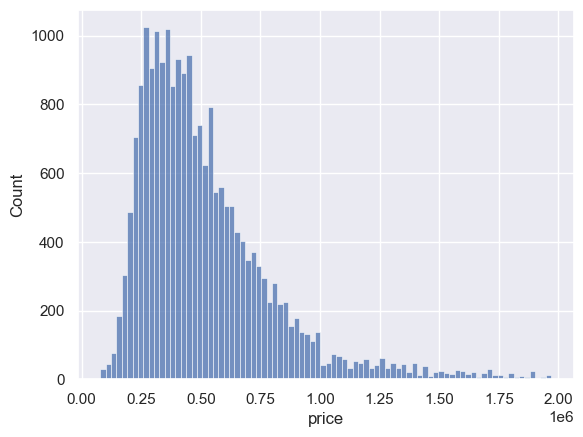

In [10]:
df = df.sort_values('price', ascending=False).iloc[216:]
sns.histplot(df['price'])

<Axes: xlabel='long', ylabel='lat'>

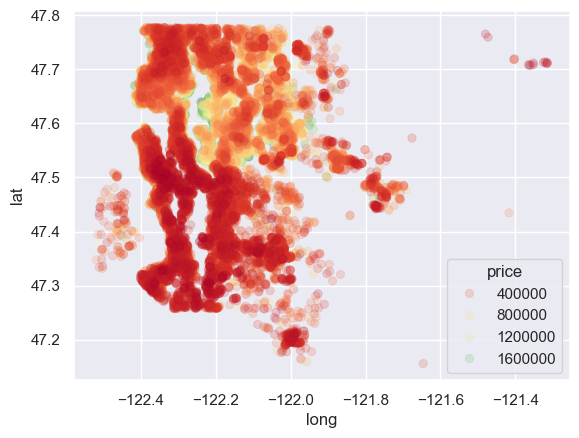

In [11]:
sns.scatterplot(x='long', y='lat', hue='price', data=df,
               edgecolor=None, alpha=0.2, palette='RdYlGn')

<Axes: xlabel='waterfront', ylabel='price'>

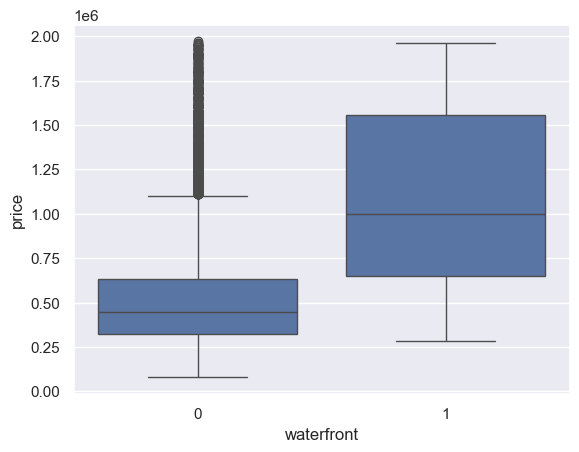

In [12]:
sns.boxplot(x='waterfront', y='price', data=df)

<Axes: xlabel='month'>

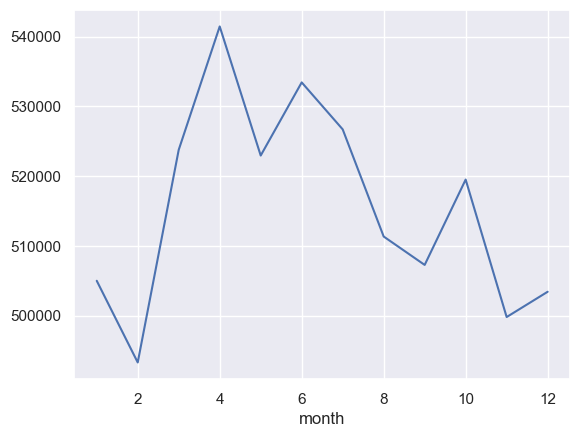

In [13]:
df = df.drop('id', axis=1)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df = df.drop('date', axis=1)
df = df.drop('zipcode', axis=1)

df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

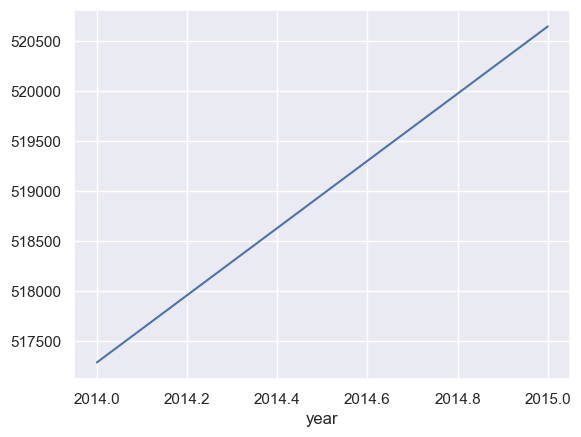

In [14]:
df.groupby('year').mean()['price'].plot()

2025-09-24 21:01:51.094044: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-24 21:01:51.094081: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-24 21:01:51.094088: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-24 21:01:51.094105: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-24 21:01:51.094116: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-09-24 21:01:51.504738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


<Axes: >

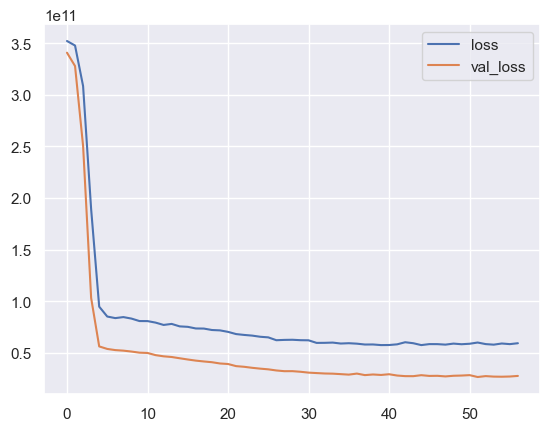

In [15]:
X = df.drop('price', axis=1).values
y = df['price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train, y_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5)

model.fit(x=scaled_train, y=y_train, validation_data=(scaled_test, y_test),
          batch_size=128, epochs=200, verbose=0, callbacks=[early_stop])

pd.DataFrame(model.history.history).plot()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

pred = model.predict(scaled_test)
mean_squared_error(y_test, pred)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


27687964889.335644

In [17]:
mean_absolute_error(y_test, pred)

112268.40237782808

In [18]:
explained_variance_score(y_test, pred)

0.6778858586293978

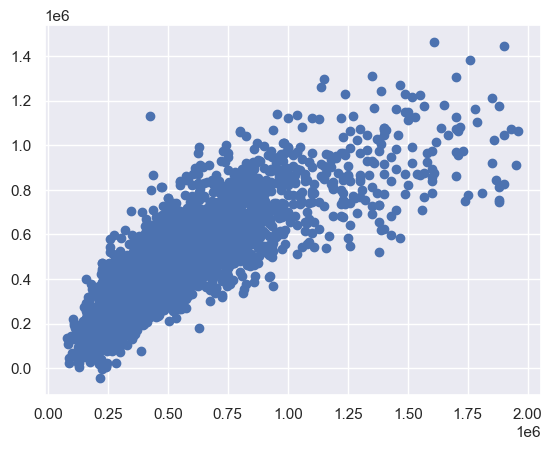

In [19]:
plt.scatter(y_test, pred)